<a href="https://colab.research.google.com/github/Gursimar1805/LogisticRegression/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Titanic DataSet
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

In [ ]:
df1 = pd.read_csv('/content/titanic_train.csv')

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
# Moved Survived col to last so it can easily be dropped
df1 = df1[[col for col in df1.columns if col != 'Survived']+['Survived']]

In [ ]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df1.shape

(891, 12)

In [ ]:
df2 = pd.read_csv('/content/titanic_test.csv')

In [ ]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df2.shape

(418, 11)

In [ ]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
df2['Survived'] = pd.NA

In [ ]:
df3 = pd.concat([df1,df2],axis = 0, ignore_index = True )

In [ ]:
df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df3.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,<NA>
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,<NA>
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,<NA>
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,<NA>
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,<NA>


In [ ]:
df3.shape

(1309, 12)

In [ ]:
df3.isnull().sum()/len(df3)

,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.200917
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000764
Cabin,0.774637


# Handle Missing Values

In [ ]:
df3['Age'] = df3['Age'].fillna(df3['Age'].median())

In [ ]:
df3.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.837836,12.905241,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# Fill Embarked with mode as it is categorical data
df3['Embarked'] = df3['Embarked'].fillna(df3['Embarked'].mode()[0])

In [ ]:
df3['Fare'] = df3['Fare'].fillna(df3['Fare'].median())

In [ ]:
# Encode Categorical variables Sex and Embarked
df3 = pd.get_dummies(df3,columns=['Sex','Embarked'],drop_first=True)

In [ ]:
df3.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Sex_male,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,False,False,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,False,False,True
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,True,False,True


In [ ]:
df3.drop(columns=['Name','Ticket','PassengerId','Cabin'],inplace=True)

In [ ]:
df3.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Sex_male', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [ ]:
# Split back into Train and Test
train_df3 = df3[df3['Survived'].notna()].copy()# not filling NA Value

In [ ]:
train_df3.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


In [ ]:
test_df3 = df3[df3['Survived'].isna()].copy() #filled NA value in survived

In [ ]:
test_df3.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
891,3,34.5,0,0,7.8292,<NA>,True,True,False
892,3,47.0,1,0,7.0000,<NA>,False,False,True
893,2,62.0,0,0,9.6875,<NA>,True,True,False
894,3,27.0,0,0,8.6625,<NA>,True,False,True
895,3,22.0,1,1,12.2875,<NA>,False,False,True


In [ ]:
X = train_df3.drop(columns=['Survived'])
#split data into dependent and independent
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [ ]:
y = train_df3['Survived'].astype(int) #
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
X_test_final = test_df3.drop(columns=['Survived'])

In [ ]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_final = scaler.transform(X_test_final)

In [ ]:
y.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
# Apply SMOTE to handle imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X_scaled,y)

In [ ]:
# Step 11: Train/test split (for validation)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Train logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Evaluate
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Validation Accuracy : ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Validation Accuracy :  0.8090909090909091
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       103
           1       0.80      0.85      0.83       117

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



In [ ]:
# Save model and scaler
import joblib
joblib.dump(model,'titanic_logistic_model_smote.pkl')
joblib.dump(scaler,'titanic_scaler_smote.pkl')

['titanic_scaler_smote.pkl']

# EDA: Visualization

what was the overall survival rate? Chart Type:Pie chart or bar plot


([<matplotlib.axis.XTick at 0x7b2f9e556990>,
 [Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')])

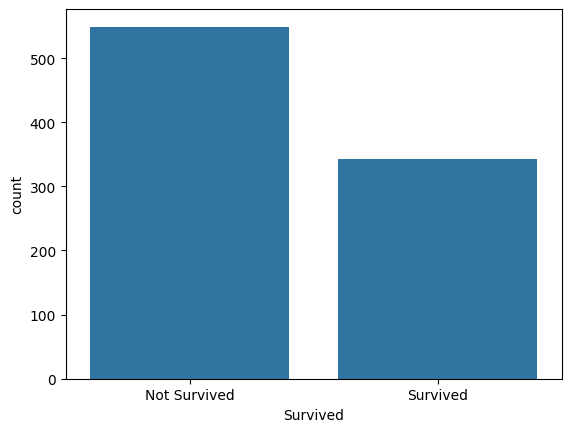

In [ ]:
sns.countplot(x='Survived',data=train_df3)
plt.xticks([0,1],['Not Survived','Survived'])

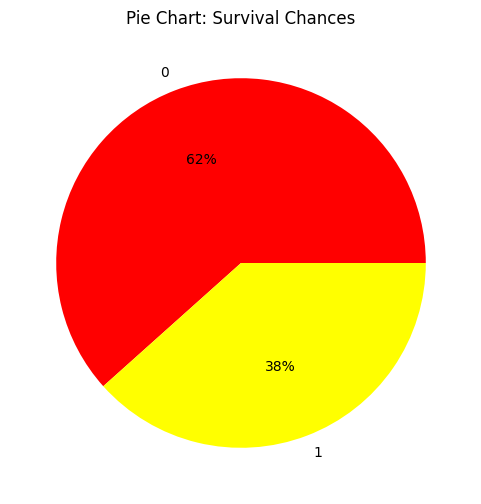

In [ ]:
# 3. Pie Chart: Proportion of categories
Survival_counts = train_df3['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Survival_counts, labels=Survival_counts.index, autopct='%1.0f%%', colors=['red',  'yellow'])
plt.title('Pie Chart: Survival Chances')
plt.show()

# Did Gender influence survival rate?

Chart type : Grouped bar plot/stacked bar chart

<Axes: xlabel='Sex_male', ylabel='count'>

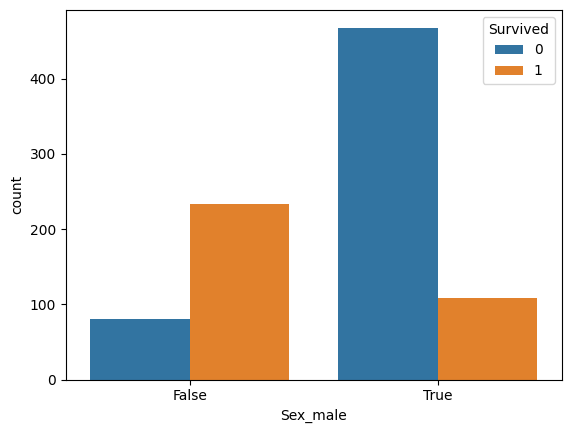

In [ ]:
sns.countplot(x='Sex_male',hue='Survived',data=train_df3)

In [ ]:
train_df3.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Sex_male', 'Embarked_Q', 'Embarked_S'], dtype='object')

# How did passenger class (Pclass)
# affect Survival?

<Axes: xlabel='Pclass', ylabel='count'>

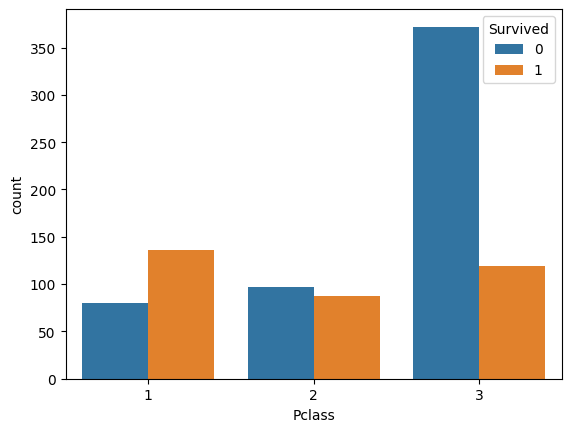

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=train_df3)

# What was the age distribution of survivors and non-survivors?
Chart Type: KDE plot or histogram

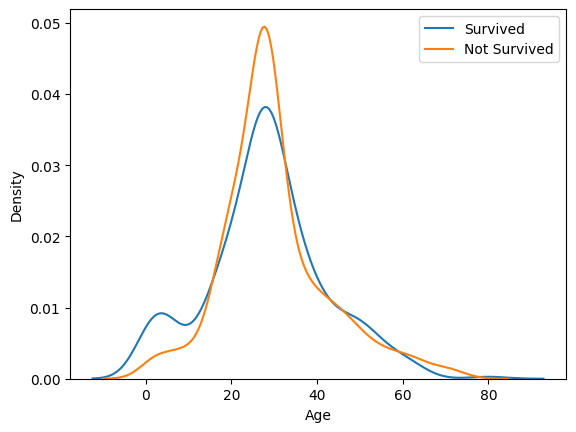

In [ ]:
sns.kdeplot(train_df3[train_df3['Survived']==1]['Age'],label='Survived')
sns.kdeplot(train_df3[train_df3['Survived']==0]['Age'],label='Not Survived')
plt.legend()

#  Did family size impact survival?
Chart Type: Bar plot or box plot

Derived Feature: FamilySize = SibSp + Parch + 1

<Axes: xlabel='FamilySize', ylabel='Survived'>

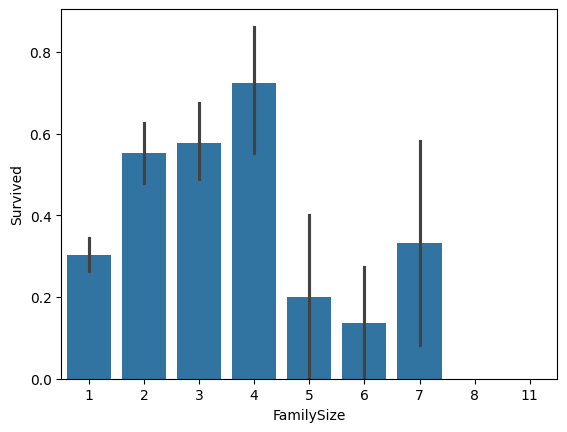

In [ ]:
train_df3['FamilySize'] = train_df3['SibSp'] + train_df3['Parch'] + 1
sns.barplot(x='FamilySize',y='Survived',data=train_df3)

# Was there a relationship between fare and survival?
Chart Type: Box plot or violin plot

<Axes: xlabel='Survived', ylabel='Fare'>

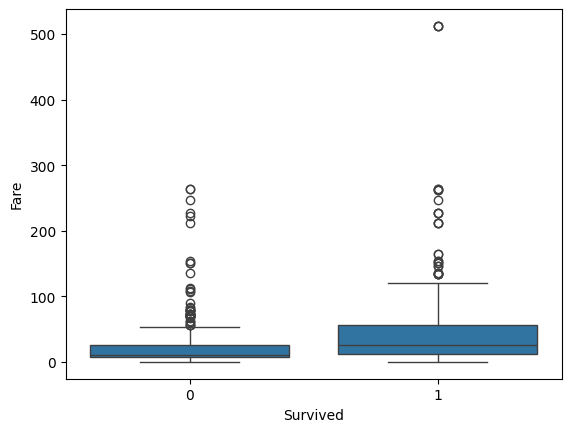

In [ ]:
sns.boxplot(x='Survived',y='Fare',data = train_df3)

# How did embarkation port affect survival?
Chart Type: Grouped bar plot



<Axes: xlabel='Embarked_Q', ylabel='count'>

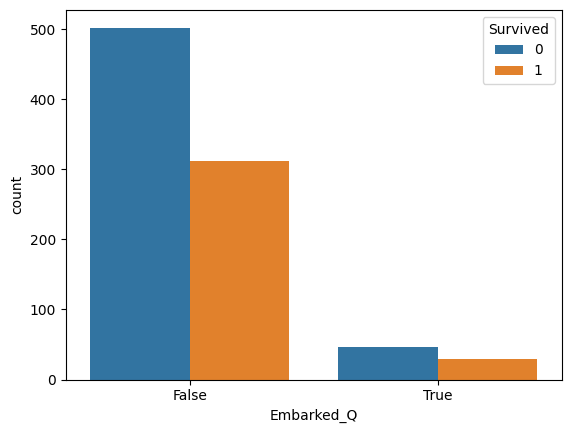

In [ ]:
sns.countplot(x='Embarked_Q',hue='Survived',data = train_df3)

<Axes: xlabel='Embarked_S', ylabel='count'>

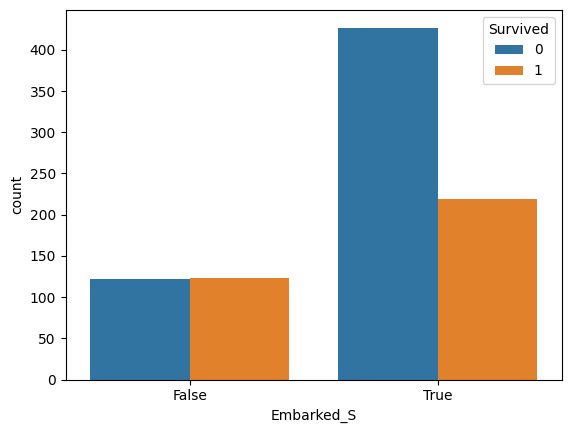

In [ ]:
sns.countplot(x='Embarked_S',hue='Survived',data = train_df3)

# Which combinations of class and gender had higher survival ?

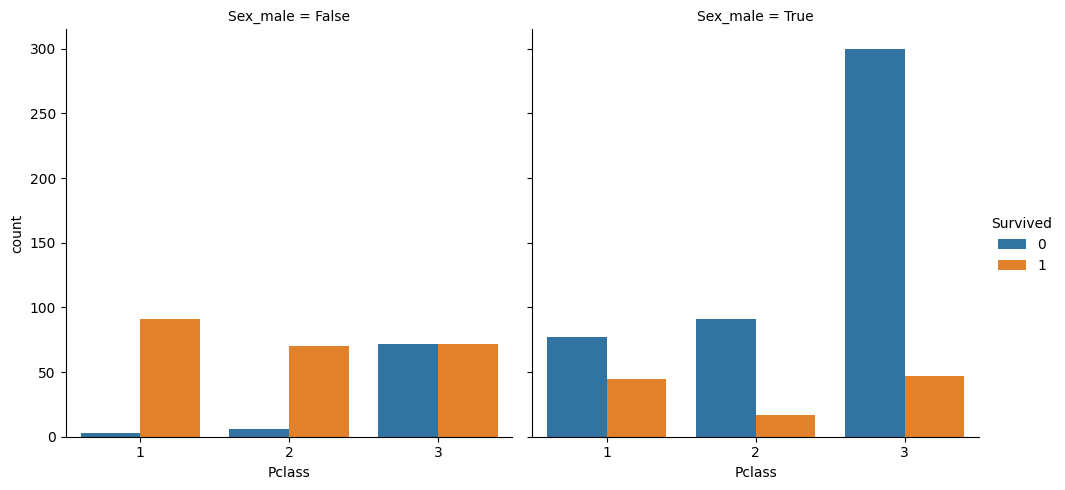

In [ ]:
sns.catplot(x='Pclass',hue='Survived',col='Sex_male',kind='count',data = train_df3)

#  Were younger passengers more likely to survive in each class?
Chart Type: Box plot per class split by survival

<Axes: xlabel='Pclass', ylabel='Age'>

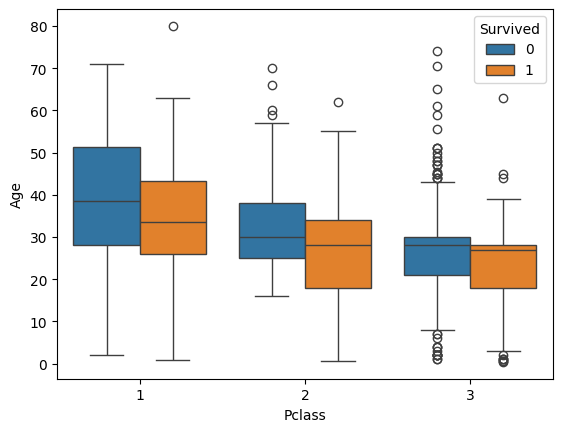

In [ ]:
sns.boxplot(x='Pclass', y='Age',hue='Survived',data=train_df3)

<Axes: >

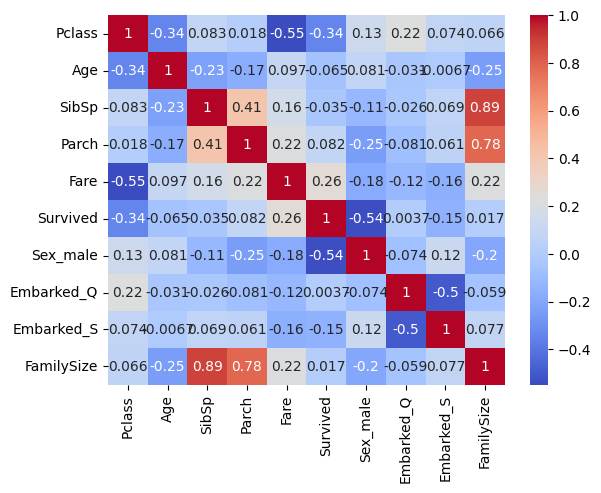

In [ ]:
sns.heatmap(train_df3.corr(),annot=True,cmap='coolwarm')

| Question                     | Chart Type        |
| ---------------------------- | ----------------- |
| Overall survival             | Pie / bar         |
| Gender vs survival           | Grouped bar       |
| Class vs survival            | Grouped bar       |
| Age vs survival              | KDE / histogram   |
| Family size vs survival      | Bar plot          |
| Fare vs survival             | Box / violin      |
| Embarkation port vs survival | Grouped bar       |
| Gender + Class               | Catplot / heatmap |
| Age by class & survival      | Boxplot           |
| Fare by class & survival     | Violin            |


# Define Function for Chi-Square Test

In [ ]:
from scipy.stats import chi2_contingency
def chi_square_test(cat_var, target='Survived'):
    contingency_table = pd.crosstab(train_df3[cat_var], train_df3[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {cat_var} vs {target}")
    print("Chi2 Statistic:", chi2)
    print("Degrees of Freedom:", dof)
    print("P-value:", p)
    print("Significant?" , "Yes " if p < 0.05 else "No ")
    print("-" * 40)

In [ ]:
chi_square_test('Sex_male')

Chi-Square Test for Sex_male vs Survived
Chi2 Statistic: 260.71702016732104
Degrees of Freedom: 1
P-value: 1.1973570627755645e-58
Significant? Yes 
----------------------------------------


In [ ]:
chi_square_test('Pclass')
chi_square_test('Embarked_Q')
chi_square_test('Embarked_S')

Chi-Square Test for Pclass vs Survived
Chi2 Statistic: 102.88898875696056
Degrees of Freedom: 2
P-value: 4.549251711298793e-23
Significant? Yes 
----------------------------------------
Chi-Square Test for Embarked_Q vs Survived
Chi2 Statistic: 0.0
Degrees of Freedom: 1
P-value: 1.0
Significant? No 
----------------------------------------
Chi-Square Test for Embarked_S vs Survived
Chi2 Statistic: 19.279400244953347
Degrees of Freedom: 1
P-value: 1.1291808110540787e-05
Significant? Yes 
----------------------------------------
